## Geração de Dados

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

No conjunto de dados X colocamos os dados das colunas referentes às palavras. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

## Criação de Bolhas de Dados

In [222]:
from sklearn.datasets.samples_generator import make_blobs

n_features = 2
n_samples = 300
n_classes = 3

_X, _y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std = 1.5, random_state = 1)

O conjunto de dados $X$ possui dois atributos com valores gerados aleatoriamente

In [223]:
_X[:10]

array([[-11.53054142,  -2.76155619],
       [ -6.03888019,  -8.68334308],
       [-11.8273291 ,  -0.27929557],
       [ -1.59405642,   4.06701851],
       [ -1.36211033,   4.58500284],
       [ -0.86536192,   4.61304168],
       [-10.20167849,  -5.14925323],
       [ -0.30827598,   3.38089808],
       [ -2.62993494,   5.75872021],
       [ -7.69916763,  -8.02353149]])

O vetor de dados $y$ possui o valor das classes (centers).

In [224]:
_y[:10]

array([1, 2, 1, 0, 0, 0, 1, 0, 0, 2])

In [225]:
groups = ['A','B','C']
y_g = [groups[i] for i in _y]

In [226]:
import pandas as pd
data = pd.DataFrame({
    'x1' : _X[:,0], 
    'x2' : _X[:,1], 
    'target' : y_g})

data["target"] = data["target"].astype('category')

In [227]:
data.head()

x1        x2 target
0 -11.530541 -2.761556      B
1  -6.038880 -8.683343      C
2 -11.827329 -0.279296      B
3  -1.594056  4.067019      A
4  -1.362110  4.585003      A

## Visualização dos Dados

(-15.014912473844953,
 2.960501124233119,
 -12.919758390050005,
 8.679033833281885)

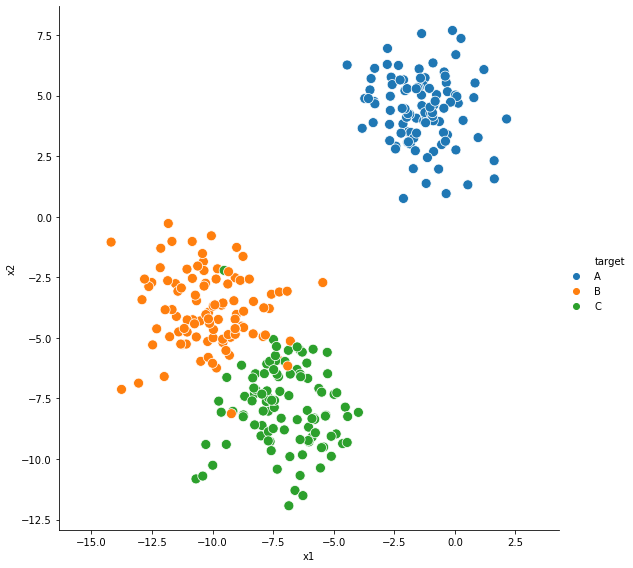

In [228]:
sns.relplot(x='x1', y='x2', hue='target', data = data, height=8, s=100)
plt.axis('equal')

## Escolha do Objetivo e Preparação dos Dados para Indução

Definindo qual é o nome da coluna que é nosso objetivo de predição (classificação)

In [229]:
target = "target"

No conjunto de dados X colocamos os dados das colunas referentes aos atributos. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

In [230]:
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

In [231]:
X.head()

x1        x2
0 -11.530541 -2.761556
1  -6.038880 -8.683343
2 -11.827329 -0.279296
3  -1.594056  4.067019
4  -1.362110  4.585003

In [232]:
y[:6]

array([0, 1, 0, 2, 2, 2], dtype=int64)

## Separação dos Dados em Treino e Teste

Deixamos 25% para teste, a separação será estratificada e a semente é 10.

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

## Definição do Classificador

In [234]:
# Definir o classificador
from sklearn import svm
model = svm.SVC(C=1.0, kernel = "linear", max_iter = 100)

In [235]:
# Printar o classificador para ver os seus parâmetros
model.fit(X_train, y_train) 

C:\Users\andres\Anaconda3\envs\dm\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=100, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predição do Conjunto de Teste 

In [236]:
y_test_pred = model.predict(X_test)

In [237]:
y_test_pred

array([1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 2, 0, 2], dtype=int64)

## Avaliação da Predição

### Matriz de Confusão

In [238]:
from pandas import crosstab
crosstab(y_test, y_test_pred, rownames = ['y_test'], colnames = ['y_test_pred ->']  )

y_test_pred ->   0   1   2
y_test                    
0               23   2   0
1                0  25   0
2                0   0  25

Há uma outra forma direta de fazer a matriz de confusão, no entanto não é muito boa de visualizar, pois retorna apenas uma matriz.

In [239]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[23,  2,  0],
       [ 0, 25,  0],
       [ 0,  0, 25]], dtype=int64)

### Métrica de Acurácia

In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9733333333333334

### Métricas de Avaliação por Classe: precision, recall e f1-score

In [241]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.93      1.00      0.96        25
           2       1.00      1.00      1.00        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## Visualização das Predições

In [242]:
y

array([0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1], d

Text(0.5, 1.0, 'SVM')

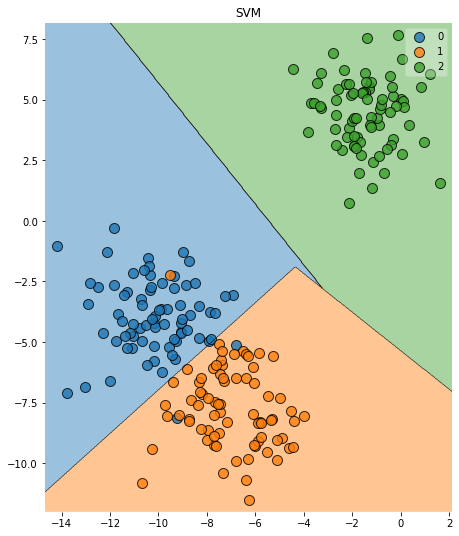

In [243]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM')

Text(0.5, 1.0, 'SVM')

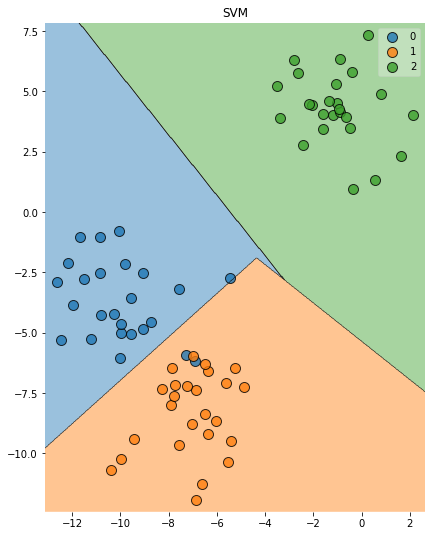

In [244]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_test.to_numpy(), y_test, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM') 